In [4]:
#import the dependinces
import pandas as pd
import csv
import numpy as np
import gmaps
import datetime
import time
from scipy import stats
from matplotlib import pyplot as plt
import os
import warnings

from zw_config import g_key

# Ignore unnecessary gmaps warning
warnings.filterwarnings('ignore')

In [8]:
#Read the crime data
NYC = pd.read_csv("../crime_data/Cleaned_NYC_Arrests.csv")
lapd = pd.read_csv("../crime_data/Cleaned_La_Crime_Data.csv")

NYC_october_2014 = pd.read_csv("../crime_data/october_2014_NYC_data.csv")
LA_october_2017 = pd.read_csv("../crime_data/october_2017_LA_data.csv")

In [11]:
#New York City DataFrame
NYC.head()

,Unnamed: 0,ARREST_DATE,PD_DESC,OFNS_DESC,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude
0,3,12/31/2017,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,25-44,M,WHITE,40.763523,-73.987074
1,4,12/31/2017,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,45-64,M,BLACK,40.759768,-73.989811
2,6,12/31/2017,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,18-24,F,WHITE HISPANIC,40.722199,-73.977122
3,8,12/31/2017,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,25-44,M,BLACK HISPANIC,40.787496,-73.949752
4,10,12/31/2017,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,25-44,M,WHITE HISPANIC,40.702840,-73.929467


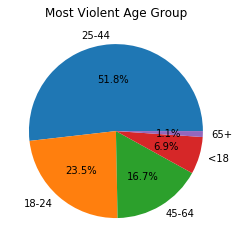

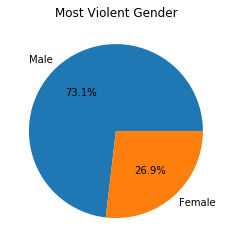

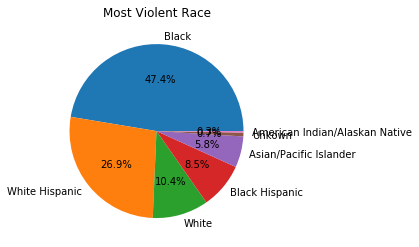

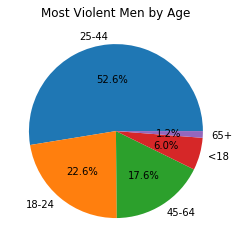

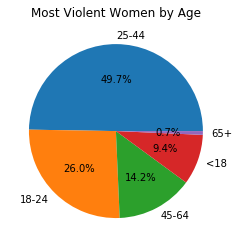

In [114]:
#Run basic analysis to see the difference between genders and ages

age = NYC["AGE_GROUP"]
age_groups = age.value_counts()
labels = ["25-44", "18-24", "45-64", "<18", "65+"]
plt.pie(age_groups, labels=labels, autopct="%1.1f%%")
plt.title("Most Violent Age Group")
plt.show()

sex = NYC["PERP_SEX"]
sex_groups = sex.value_counts()
labels_2 = ["Male", "Female"]
plt.pie(sex_groups, labels=labels_2, autopct="%1.1f%%")
plt.title("Most Violent Gender")
plt.show()

race = NYC["PERP_RACE"]
race_groups = race.value_counts()
labels_3 = ["Black", "White Hispanic", "White", "Black Hispanic", "Asian/Pacific Islander", "Unkown", "American Indian/Alaskan Native"]
plt.pie(race_groups, labels=labels_3, autopct="%1.1f%%")
plt.title("Most Violent Race")
plt.show()

age_sex = NYC[["AGE_GROUP", "PERP_SEX"]]
male_age = age_sex.loc[age_sex["PERP_SEX"] == "M",:]
female_age = age_sex.loc[age_sex["PERP_SEX"] == "F",:]
male_age = male_age["AGE_GROUP"]
female_age = female_age["AGE_GROUP"]

male_age = male_age.value_counts()
labels_4 = ["25-44", "18-24", "45-64", "<18", "65+"]
plt.pie(male_age, labels=labels_4, autopct="%1.1f%%")
plt.title("Most Violent Men by Age")
plt.show()

female_age = female_age.value_counts()
labels_5 = ["25-44", "18-24", "45-64", "<18", "65+"]
plt.pie(female_age, labels=labels_5, autopct="%1.1f%%")
plt.title("Most Violent Women by Age")
plt.show()

In [113]:
#Sort by number of arrests per day and run basic calculations
date_groups = NYC.groupby("ARREST_DATE")
crime_counts = date_groups.count()
crime_counts = crime_counts[["PD_DESC"]]
crime_counts = crime_counts.rename(columns = {"PD_DESC": "Number of arrests"})
arrest_count_by_day = crime_counts.sort_values("Number of arrests", ascending=True)
most_violent_day = arrest_count_by_day.max()
least_violent_day = crime_counts.loc[crime_counts["Number of arrests"] == 50,:]
average_arrests = arrest_count_by_day["Number of arrests"].mean()
arrest_count_by_day.head()

,Number of arrests
ARREST_DATE,
9/6/2014,7
12/31/2014,50
12/24/2014,51
11/27/2014,53
11/23/2017,56


In [112]:
#Show the results

print(f"""
From 2014 to 2017, there were an average of {round(average_arrests)} arrests per day due to violent crimes.
The most violent crime arrests ever recorded in a day was {most_violent_day["Number of arrests"]}.
The least violent crime arrests ever recorded in a day was {least_violent_day["Number of arrests"]}.
""")


From 2014 to 2017, there were an average of 592.0 arrests per day due to violent crimes.
The most violent crime arrests ever recorded in a day was 1489.
The least violent crime arrests ever recorded in a day was Series([], Name: Number of arrests, dtype: int64).



In [111]:
#Add a datetime column to use for a scatter plot

arrest_count_by_day["Date"] = arrest_count_by_day.index
aligned_dates = arrest_count_by_day.sort_values("Date", ascending=False)
arrest_count_by_day['Date'] = pd.to_datetime(arrest_count_by_day.Date)
arrest_count_by_day = arrest_count_by_day.sort_values(by="Date")
arrest_count_by_day.head()

,Number of arrests,Date
DATE OCC,,
1/1/2014,1489,2014-01-01
1/2/2014,454,2014-01-02
1/3/2014,539,2014-01-03
1/4/2014,451,2014-01-04
1/5/2014,447,2014-01-05


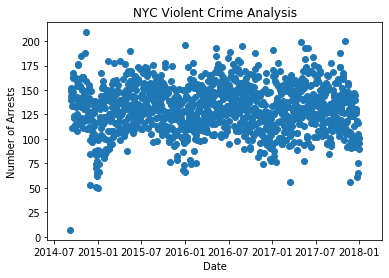

In [27]:
#Create a scatter plot from the arrest count by day dataframe

x_axis = arrest_count_by_day["Date"]
y_axis = arrest_count_by_day["Number of arrests"]
plt.scatter(x_axis, y_axis)
plt.title("NYC Violent Crime Analysis")
plt.ylabel("Number of Arrests")
plt.xlabel("Date")
plt.show()

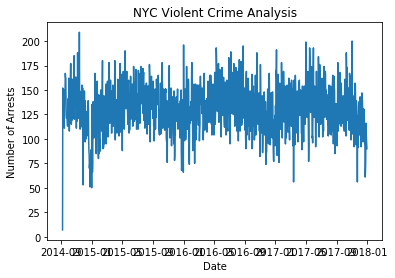

In [28]:
#Plot a line chart from the same data, just for funzies

plt.plot(x_axis, y_axis)
plt.xlabel("Date")
plt.ylabel("Number of Arrests")
plt.title("NYC Violent Crime Analysis")
plt.show()

In [29]:
#October 2014 New York City DataFrame
NYC_october_2014.head()

,ARREST_DATE,PD_DESC,OFNS_DESC,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude
0,10/31/14,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,25-44,M,WHITE HISPANIC,40.731668,-73.989415
1,10/31/14,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,18-24,M,WHITE HISPANIC,40.864328,-73.868406
2,10/31/14,"MURDER,UNCLASSIFIED",MURDER & NON-NEGL. MANSLAUGHTER,25-44,F,BLACK,40.671111,-73.913563
3,10/31/14,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,18-24,F,BLACK,40.648867,-73.950822
4,10/31/14,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,25-44,M,BLACK,40.717115,-73.920426


In [120]:
#October 2014 NYC data
NYC_october_2014.head()

,ARREST_DATE,PD_DESC,OFNS_DESC,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude
0,10/31/14,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,25-44,M,WHITE HISPANIC,40.731668,-73.989415
1,10/31/14,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,18-24,M,WHITE HISPANIC,40.864328,-73.868406
2,10/31/14,"MURDER,UNCLASSIFIED",MURDER & NON-NEGL. MANSLAUGHTER,25-44,F,BLACK,40.671111,-73.913563
3,10/31/14,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,18-24,F,BLACK,40.648867,-73.950822
4,10/31/14,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,25-44,M,BLACK,40.717115,-73.920426


In [121]:
#Plot a heatmap showing the most violent parts of NYC

locations = NYC_october_2014[["Latitude", "Longitude"]]

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, max_intensity=10, point_radius=10)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [136]:
#LA DataFrame
lapd.head()

,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Weapon Desc,LAT,LON
0,7/5/2014,600,Olympic,VEHICLE,NaN,34.0427,-118.2916
1,8/4/2014,1430,Central,VEHICLE,NaN,34.0464,-118.2447
2,2/25/2014,1300,Wilshire,VEHICLE,NaN,34.0374,-118.3740
3,11/14/2014,2300,Newton,VEHICLE,NaN,34.0242,-118.2623
4,10/27/2014,1300,Olympic,VEHICLE,NaN,34.0608,-118.2860


In [137]:
violence_df = lapd.loc[
    (lapd['Crm Cd Desc']=='RAPE')|    
    (lapd['Crm Cd Desc']=='ASSAULT')|    
    (lapd['Crm Cd Desc']=='BATTERY')|    
    (lapd['Crm Cd Desc']=='ARSON')| 
    (lapd['Crm Cd Desc']=='CRIMINAL HOMICIDE')|
    (lapd['Crm Cd Desc']=='CRIMINAL THREATS')|    
    (lapd['Crm Cd Desc']=='SHOTS FIRED')|    
    (lapd['Crm Cd Desc']=='WEAPONS POSSESSION/BOMBING')|    
    (lapd['Crm Cd Desc']=='CRUELTY TO ANIMALS')|
    (lapd['Crm Cd Desc']=='KIDNAPPING')|
    (lapd['Crm Cd Desc']=='LYNCHING')|
    (lapd['Crm Cd Desc']=='HUMAN TRAFFICKING')|
    (lapd['Crm Cd Desc']=='TELEPHONE PROPERTY - DAMAGE')|
    (lapd['Crm Cd Desc']=='INCITING A RIOT')|
    (lapd['Crm Cd Desc']=='MANSLAUGHTER, NEGLIGENT')]

In [138]:
violence_df.head()

,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Weapon Desc,LAT,LON
9,8/25/2014,2100,Southwest,BATTERY,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",34.0000,-118.3308
11,1/3/2014,2345,Newton,BATTERY,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",34.0407,-118.2468
12,5/24/2014,1715,Olympic,RAPE,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",34.0728,-118.3004
17,10/12/2014,1400,Central,ASSAULT,KNIFE WITH BLADE 6INCHES OR LESS,34.0460,-118.2509
29,8/7/2014,1300,77th Street,BATTERY,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",33.9747,-118.2695


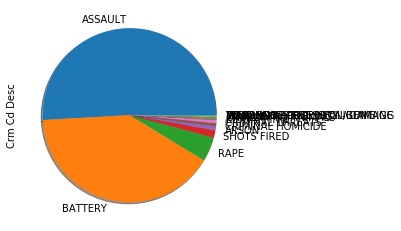

In [139]:
pie_df = violence_df['Crm Cd Desc'].value_counts()
pie_df.plot(kind='pie', shadow=True)
plt.show()

In [140]:
#Sort by number of arrests per day and run basic calculations
date_groups = lapd.groupby("DATE OCC")
crime_counts = date_groups.count()
crime_counts = crime_counts[["TIME OCC"]]
crime_counts = crime_counts.rename(columns = {"TIME OCC": "Number of arrests"})
arrest_count_by_day = crime_counts.sort_values("Number of arrests", ascending=True)
most_violent_day = arrest_count_by_day.max()
least_violent_day = crime_counts.loc[crime_counts["Number of arrests"] == 50,:]
average_arrests = arrest_count_by_day["Number of arrests"].mean()
arrest_count_by_day.head()

,Number of arrests
DATE OCC,
2/9/2014,394
5/11/2014,420
3/9/2014,422
1/7/2014,424
1/8/2014,426


In [141]:
#Add a datetime column to use for a scatter plot
arrest_count_by_day["Date"] = arrest_count_by_day.index
aligned_dates = arrest_count_by_day.sort_values("Date", ascending=False)
arrest_count_by_day['Date'] = pd.to_datetime(arrest_count_by_day.Date)
arrest_count_by_day = arrest_count_by_day.sort_values(by="Date")
arrest_count_by_day.head()

,Number of arrests,Date
DATE OCC,,
1/1/2014,1489,2014-01-01
1/2/2014,454,2014-01-02
1/3/2014,539,2014-01-03
1/4/2014,451,2014-01-04
1/5/2014,447,2014-01-05


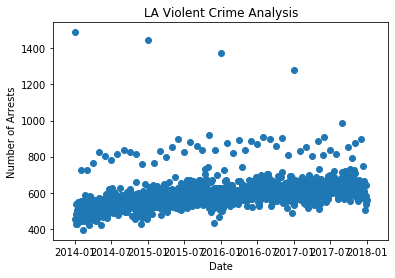

In [142]:
#Create a scatter plot from the arrest count by day dataframe
x_axis = arrest_count_by_day["Date"]
y_axis = arrest_count_by_day["Number of arrests"]
plt.scatter(x_axis, y_axis)
plt.title("LA Violent Crime Analysis")
plt.ylabel("Number of Arrests")
plt.xlabel("Date")
plt.show()

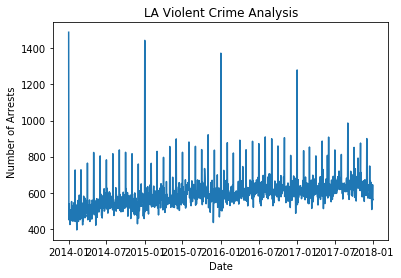

In [144]:
#Plot a line chart from the same data, cuz why not?
plt.plot(x_axis, y_axis)
plt.xlabel("Date")
plt.ylabel("Number of Arrests")
plt.title("LA Violent Crime Analysis")
plt.show()

In [117]:
#October 2017 LA DataFrame
LA_october_2017.head()

,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Weapon Desc,LAT,LON
0,10/22/2017,1400,Topanga,THEFT,NaN,34.1911,-118.5644
1,10/12/2017,900,West Valley,VANDALISM,NaN,34.2029,-118.5513
2,10/10/2017,1930,West Valley,ASSAULT,MACE/PEPPER SPRAY,34.1775,-118.5338
3,10/11/2017,1700,Harbor,VANDALISM,NaN,33.8613,-118.2962
4,10/3/2017,1050,Central,THEFT,NaN,34.0563,-118.2374


In [118]:
#Plot a heatmap showing the most violent parts of LA

locations = LA_october_2017[["LAT", "LON"]]

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, max_intensity=10, point_radius=6)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [33]:
ny_cleaned_df = NYC[["ARREST_DATE", "PD_DESC"]]
ny_cleaned_df.head()

ny_df = pd.to_datetime(ny_cleaned_df["ARREST_DATE"])
ny_df = pd.DataFrame(ny_df)

In [34]:
#separate NYC data into 2014 dataframe
start_date = datetime.datetime(2014, 1, 1)
end_date = datetime.datetime(2014, 12, 31)
fourteen = (ny_df['ARREST_DATE'] > start_date) & (ny_df['ARREST_DATE'] <= end_date)
fourteen_df = ny_df.loc[fourteen]
print(fourteen_df)

       ARREST_DATE
143926  2014-12-31
143927  2014-12-31
143928  2014-12-31
143929  2014-12-31
143930  2014-12-31
...            ...
158809  2014-09-06
158810  2014-09-06
158811  2014-09-06
158812  2014-09-06
158813  2014-09-06

[14888 rows x 1 columns]


In [35]:
#create lists for months in each year of 2014 dataframe
sep_14 = []
oct_14 = []
nov_14 = []
dec_14 = []

In [36]:
#push monthly data into their respective lists
for date in fourteen_df["ARREST_DATE"]:
    if (date > datetime.datetime(2014, 9, 1)) & (date < datetime.datetime(2014, 9, 30)):
        sep_14.append(date)
    elif (date > datetime.datetime(2014, 10, 1)) & (date < datetime.datetime(2014, 10, 31)):
            oct_14.append(date)
    elif (date > datetime.datetime(2014, 11, 1)) & (date < datetime.datetime(2014, 11, 30)):
            nov_14.append(date)
    elif (date > datetime.datetime(2014, 12, 1)) & (date < datetime.datetime(2014, 12, 31)):
            dec_14.append(date)

In [55]:
#create list of number of arrests in each month
months_14 = [len(sep_14), len(oct_14), len(nov_14), len(dec_14)]
#create monthly chart labels
x_axis_14 = ["sep", "oct", "nov", "dec"]

<function matplotlib.pyplot.show(*args, **kw)>

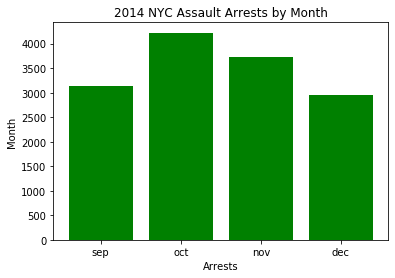

In [56]:
#plot arrests in 2014 by month
arrests_14 = plt.bar(x_axis_14, months_14, color="g")
plt.title("2014 NYC Assault Arrests by Month")
plt.xlabel("Arrests")
plt.ylabel("Month")
plt.show

In [40]:
#repeat process for 2015, 2016, and 2017
start_date_1 = datetime.datetime(2015, 1, 1)
end_date_1 = datetime.datetime(2015, 12, 31)
fifteen = (ny_df['ARREST_DATE'] > start_date_1) & (ny_df['ARREST_DATE'] <= end_date_1)
fifteen_df = ny_df.loc[fifteen]
print(fifteen_df)

       ARREST_DATE
96158   2015-12-31
96159   2015-12-31
96160   2015-12-31
96161   2015-12-31
96162   2015-12-31
...            ...
143786  2015-01-02
143787  2015-01-02
143788  2015-01-02
143789  2015-01-02
143790  2015-01-02

[47633 rows x 1 columns]


In [41]:
jan_15 = []
feb_15 = []
mar_15 = []
apr_15 = []
may_15 = []
jun_15 = []
jul_15 = []
aug_15 = []
sep_15 = []
oct_15 = []
nov_15 = []
dec_15 = []

In [42]:
for date in fifteen_df["ARREST_DATE"]:
    if (date > datetime.datetime(2015, 1, 1)) & (date < datetime.datetime(2015, 1, 31)):
        jan_15.append(date)
    elif (date > datetime.datetime(2015, 2, 1)) & (date < datetime.datetime(2015, 2, 28)):
            feb_15.append(date)
    elif (date > datetime.datetime(2015, 3, 1)) & (date < datetime.datetime(2015, 3, 31)):
            mar_15.append(date)
    elif (date > datetime.datetime(2015, 4, 1)) & (date < datetime.datetime(2015, 4, 30)):
            apr_15.append(date)
    elif (date > datetime.datetime(2015, 5, 1)) & (date < datetime.datetime(2015, 5, 31)):
            may_15.append(date)
    elif (date > datetime.datetime(2015, 6, 1)) & (date < datetime.datetime(2015, 6, 30)):
            jun_15.append(date)
    elif (date > datetime.datetime(2015, 7, 1)) & (date < datetime.datetime(2015, 7, 31)):
            jul_15.append(date)
    elif (date > datetime.datetime(2015, 8, 1)) & (date < datetime.datetime(2015, 8, 31)):
            aug_15.append(date)
    elif (date > datetime.datetime(2015, 9, 1)) & (date < datetime.datetime(2015, 9, 30)):
            sep_15.append(date)
    elif (date > datetime.datetime(2015, 10, 1)) & (date < datetime.datetime(2015, 10, 31)):
            oct_15.append(date)
    elif (date > datetime.datetime(2015, 11, 1)) & (date < datetime.datetime(2015, 11, 30)):
            nov_15.append(date)
    elif (date > datetime.datetime(2015, 12, 1)) & (date < datetime.datetime(2015, 12, 31)):
            dec_15.append(date)

In [53]:
months_15 = [len(jan_15), len(feb_15), len(mar_15), len(apr_15), len(may_15), len(jun_15), len(jul_15), len(aug_15), len(sep_15), len(oct_15), len(nov_15), len(dec_15)]
x_axis = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]

<function matplotlib.pyplot.show(*args, **kw)>

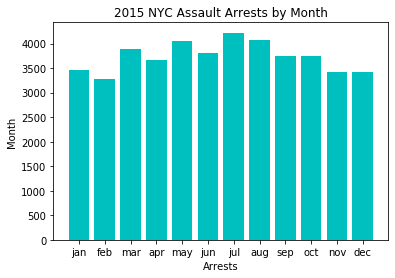

In [54]:
arrests_15 = plt.bar(x_axis, months_15, color="c")
plt.xlabel("Arrests")
plt.ylabel("Month")
plt.title("2015 NYC Assault Arrests by Month")
plt.show

In [46]:
start_date_2 = datetime.datetime(2016, 1, 1)
end_date_2 = datetime.datetime(2016, 12, 31)
sixteen = (ny_df['ARREST_DATE'] > start_date_2) & (ny_df['ARREST_DATE'] <= end_date_2)
sixteen_df = ny_df.loc[sixteen]
print(sixteen_df)

      ARREST_DATE
47586  2016-12-31
47587  2016-12-31
47588  2016-12-31
47589  2016-12-31
47590  2016-12-31
...           ...
95957  2016-01-02
95958  2016-01-02
95959  2016-01-02
95960  2016-01-02
95961  2016-01-02

[48376 rows x 1 columns]


In [47]:
jan_16 = []
feb_16 = []
mar_16 = []
apr_16 = []
may_16 = []
jun_16 = []
jul_16 = []
aug_16 = []
sep_16 = []
oct_16 = []
nov_16 = []
dec_16 = []

In [48]:
for date in sixteen_df["ARREST_DATE"]:
    if (date > datetime.datetime(2016, 1, 1)) & (date < datetime.datetime(2016, 1, 31)):
        jan_16.append(date)
    elif (date > datetime.datetime(2016, 2, 1)) & (date < datetime.datetime(2016, 2, 29)):
            feb_16.append(date)
    elif (date > datetime.datetime(2016, 3, 1)) & (date < datetime.datetime(2016, 3, 31)):
            mar_16.append(date)
    elif (date > datetime.datetime(2016, 4, 1)) & (date < datetime.datetime(2016, 4, 30)):
            apr_16.append(date)
    elif (date > datetime.datetime(2016, 5, 1)) & (date < datetime.datetime(2016, 5, 31)):
            may_16.append(date)
    elif (date > datetime.datetime(2016, 6, 1)) & (date < datetime.datetime(2016, 6, 30)):
            jun_16.append(date)
    elif (date > datetime.datetime(2016, 7, 1)) & (date < datetime.datetime(2016, 7, 31)):
            jul_16.append(date)
    elif (date > datetime.datetime(2016, 8, 1)) & (date < datetime.datetime(2016, 8, 31)):
            aug_16.append(date)
    elif (date > datetime.datetime(2016, 9, 1)) & (date < datetime.datetime(2016, 9, 30)):
            sep_16.append(date)
    elif (date > datetime.datetime(2016, 10, 1)) & (date < datetime.datetime(2016, 10, 31)):
            oct_16.append(date)
    elif (date > datetime.datetime(2016, 11, 1)) & (date < datetime.datetime(2016, 11, 30)):
            nov_16.append(date)
    elif (date > datetime.datetime(2016, 12, 1)) & (date < datetime.datetime(2016, 12, 31)):
            dec_16.append(date)

In [51]:
months_16 = [len(jan_16), len(feb_16), len(mar_16), len(apr_16), len(may_16), len(jun_16), len(jul_16), len(aug_16), len(sep_16), len(oct_16), len(nov_16), len(dec_16)]
x_axis = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]

<function matplotlib.pyplot.show(*args, **kw)>

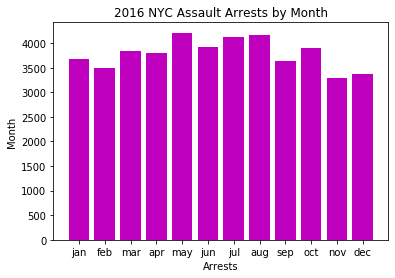

In [52]:
arrests_16 = plt.bar(x_axis, months_16, color="m")
plt.xlabel("Arrests")
plt.ylabel("Month")
plt.title("2016 NYC Assault Arrests by Month")
plt.show

In [57]:
start_date_3 = datetime.datetime(2017, 1, 1)
end_date_3 = datetime.datetime(2017, 12, 31)
seventeen = (ny_df['ARREST_DATE'] > start_date_3) & (ny_df['ARREST_DATE'] <= end_date_3)
seventeen_df = ny_df.loc[seventeen]
print(seventeen_df)

      ARREST_DATE
0      2017-12-31
1      2017-12-31
2      2017-12-31
3      2017-12-31
4      2017-12-31
...           ...
47447  2017-01-02
47448  2017-01-02
47449  2017-01-02
47450  2017-01-02
47451  2017-01-02

[47452 rows x 1 columns]


In [58]:
jan_17 = []
feb_17 = []
mar_17 = []
apr_17 = []
may_17 = []
jun_17 = []
jul_17 = []
aug_17 = []
sep_17 = []
oct_17 = []
nov_17 = []
dec_17 = []

In [59]:
for date in seventeen_df["ARREST_DATE"]:
    if (date > datetime.datetime(2017, 1, 1)) & (date < datetime.datetime(2017, 1, 31)):
        jan_17.append(date)
    elif (date > datetime.datetime(2017, 2, 1)) & (date < datetime.datetime(2017, 2, 28)):
            feb_17.append(date)
    elif (date > datetime.datetime(2017, 3, 1)) & (date < datetime.datetime(2017, 3, 31)):
            mar_17.append(date)
    elif (date > datetime.datetime(2017, 4, 1)) & (date < datetime.datetime(2017, 4, 30)):
            apr_17.append(date)
    elif (date > datetime.datetime(2017, 5, 1)) & (date < datetime.datetime(2017, 5, 31)):
            may_17.append(date)
    elif (date > datetime.datetime(2017, 6, 1)) & (date < datetime.datetime(2017, 6, 30)):
            jun_17.append(date)
    elif (date > datetime.datetime(2017, 7, 1)) & (date < datetime.datetime(2017, 7, 31)):
            jul_17.append(date)
    elif (date > datetime.datetime(2017, 8, 1)) & (date < datetime.datetime(2017, 8, 31)):
            aug_17.append(date)
    elif (date > datetime.datetime(2017, 9, 1)) & (date < datetime.datetime(2017, 9, 30)):
            sep_17.append(date)
    elif (date > datetime.datetime(2017, 10, 1)) & (date < datetime.datetime(2017, 10, 31)):
            oct_17.append(date)
    elif (date > datetime.datetime(2017, 11, 1)) & (date < datetime.datetime(2017, 11, 30)):
            nov_17.append(date)
    elif (date > datetime.datetime(2017, 12, 1)) & (date < datetime.datetime(2017, 12, 31)):
            dec_17.append(date)

In [60]:
months_17 = [len(jan_17), len(feb_17), len(mar_17), len(apr_17), len(may_17), len(jun_17), len(jul_17), len(aug_17), len(sep_17), len(oct_17), len(nov_17), len(dec_17)]
x_axis = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]

<function matplotlib.pyplot.show(*args, **kw)>

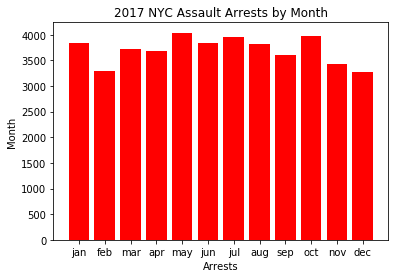

In [61]:
arrests_17 = plt.bar(x_axis, months_17, color="r")
plt.xlabel("Arrests")
plt.ylabel("Month")
plt.title("2017 NYC Assault Arrests by Month")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

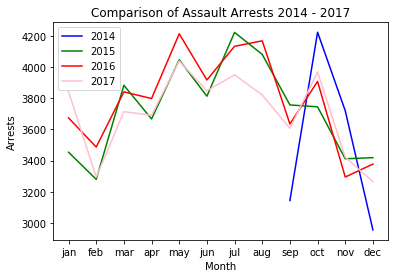

In [63]:
#for plotting all of the years 2014 needs a special month section because it only has data from September - December
months_14_special = [None, None, None, None, None, None, None, None, len(sep_14), len(oct_14), len(nov_14), len(dec_14)]

#plot of all four years compared by month
fourteen_line, = plt.plot(x_axis, months_14_special, color="blue", label="2014")
fifteen_line, = plt.plot(x_axis, months_15, color="green", label="2015")
sixteen_line, = plt.plot(x_axis, months_16, color="red", label="2016")
seventeen_line, = plt.plot(x_axis, months_17, color="pink", label="2017")

plt.legend(handles=[fourteen_line, fifteen_line, sixteen_line, seventeen_line], loc="best")
plt.xlabel("Month")
plt.ylabel("Arrests")
plt.title("Comparison of Assault Arrests 2014 - 2017")
plt.show

In [64]:
spring_15 = len(mar_15) + len(apr_15) + len(may_15)
spring_16 = len(mar_16) + len(apr_16) + len(may_16)
spring_17 = len(mar_17) + len(apr_17) + len(may_17)

summer_15 = len(jun_15) + len(jul_15) + len(aug_15)
summer_16 = len(jun_16) + len(jul_16) + len(aug_16)
summer_17 = len(jun_17) + len(jul_17) + len(aug_17)

fall_15 = len(sep_15) + len(oct_15) + len(nov_15)
fall_16 = len(sep_16) + len(oct_16) + len(nov_16)
fall_17 = len(sep_17) + len(oct_17) + len(nov_17)

winter_15 = len(dec_15) + len(jan_15) + len(feb_15)
winter_16 = len(dec_16) + len(jan_16) + len(feb_16)
winter_17 = len(dec_17) + len(jan_17) + len(feb_17)

x_axis_seasons = ["Spring", "Summer", "Fall", "Winter"]
seasons_15 = [spring_15, summer_15, fall_15, winter_15]
seasons_16 = [spring_16, summer_16, fall_16, winter_16]
seasons_17 = [spring_17, summer_17, fall_17, winter_17]

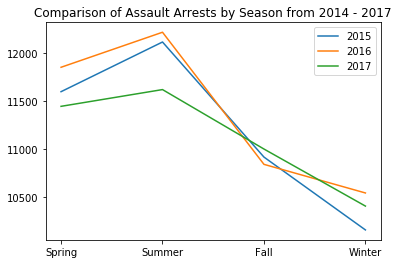

In [65]:
#plot of all three complete years grouped by season
fifteen_season, = plt.plot(x_axis_seasons, seasons_15, label="2015")
sixteen_season, = plt.plot(x_axis_seasons, seasons_16, label="2016")
seventeen_season, = plt.plot(x_axis_seasons, seasons_17, label="2017")


plt.title("Comparison of Assault Arrests by Season from 2014 - 2017")
plt.legend(handles=[fifteen_season, sixteen_season, seventeen_season], loc="best")

In [67]:
la_cleaned_df = lapd[["DATE OCC", "Crm Cd Desc"]]

la_df = pd.to_datetime(la_cleaned_df["DATE OCC"])
la_df = pd.DataFrame(la_df)
la_df.head()

,DATE OCC
0,2014-07-05
1,2014-08-04
2,2014-02-25
3,2014-11-14
4,2014-10-27


In [68]:
#following the same steps with LA data to separate them into years and months but LA has the full record for all four years
#from 2014 - 2017
start_date = datetime.datetime(2014, 1, 1)
end_date = datetime.datetime(2014, 12, 31)
la_fourteen = (la_df["DATE OCC"] > start_date) & (la_df["DATE OCC"] <= end_date)
la_fourteen_df = la_df.loc[la_fourteen]

la_jan_14 = []
la_feb_14 = []
la_mar_14 = []
la_apr_14 = []
la_may_14 = []
la_jun_14 = []
la_jul_14 = []
la_aug_14 = []
la_sep_14 = []
la_oct_14 = []
la_nov_14 = []
la_dec_14 = []

for date in la_fourteen_df["DATE OCC"]:
    if (date > datetime.datetime(2014, 1, 1)) & (date < datetime.datetime(2014, 1, 31)):
        la_jan_14.append(date)
    elif (date > datetime.datetime(2014, 2, 1)) & (date < datetime.datetime(2014, 2, 28)):
            la_feb_14.append(date)
    elif (date > datetime.datetime(2014, 3, 1)) & (date < datetime.datetime(2014, 3, 31)):
            la_mar_14.append(date)
    elif (date > datetime.datetime(2014, 4, 1)) & (date < datetime.datetime(2014, 4, 30)):
            la_apr_14.append(date)
    elif (date > datetime.datetime(2014, 5, 1)) & (date < datetime.datetime(2014, 5, 31)):
            la_may_14.append(date)
    elif (date > datetime.datetime(2014, 6, 1)) & (date < datetime.datetime(2014, 6, 30)):
            la_jun_14.append(date)
    elif (date > datetime.datetime(2014, 7, 1)) & (date < datetime.datetime(2014, 7, 31)):
            la_jul_14.append(date)
    elif (date > datetime.datetime(2014, 8, 1)) & (date < datetime.datetime(2014, 8, 31)):
            la_aug_14.append(date)
    elif (date > datetime.datetime(2014, 9, 1)) & (date < datetime.datetime(2014, 9, 30)):
            la_sep_14.append(date)
    elif (date > datetime.datetime(2014, 10, 1)) & (date < datetime.datetime(2014, 10, 31)):
            la_oct_14.append(date)
    elif (date > datetime.datetime(2014, 11, 1)) & (date < datetime.datetime(2014, 11, 30)):
            la_nov_14.append(date)
    elif (date > datetime.datetime(2014, 12, 1)) & (date < datetime.datetime(2014, 12, 31)):
            la_dec_14.append(date)
            
la_months_14 = [len(la_jan_14), len(la_feb_14), len(la_mar_14), len(la_apr_14), len(la_may_14), len(la_jun_14), len(la_jul_14), len(la_aug_14), len(la_sep_14), len(la_oct_14), len(la_nov_14), len(la_dec_14)]
x_axis = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]


<function matplotlib.pyplot.show(*args, **kw)>

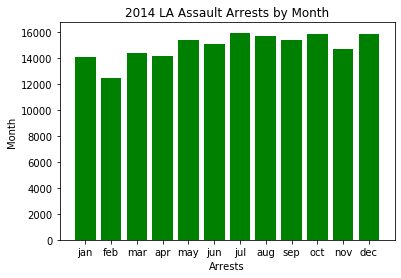

In [69]:
la_arrests_14 = plt.bar(x_axis, la_months_14, color="g")
plt.xlabel("Arrests")
plt.ylabel("Month")
plt.title("2014 LA Assault Arrests by Month")
plt.show

In [70]:
start_date = datetime.datetime(2015, 1, 1)
end_date = datetime.datetime(2015, 12, 31)
la_fifteen = (la_df["DATE OCC"] > start_date) & (la_df["DATE OCC"] <= end_date)
la_fifteen_df = la_df.loc[la_fifteen]

la_jan_15 = []
la_feb_15 = []
la_mar_15 = []
la_apr_15 = []
la_may_15 = []
la_jun_15 = []
la_jul_15 = []
la_aug_15 = []
la_sep_15 = []
la_oct_15 = []
la_nov_15 = []
la_dec_15 = []

for date in la_fifteen_df["DATE OCC"]:
    if (date > datetime.datetime(2015, 1, 1)) & (date < datetime.datetime(2015, 1, 31)):
        la_jan_15.append(date)
    elif (date > datetime.datetime(2015, 2, 1)) & (date < datetime.datetime(2015, 2, 28)):
            la_feb_15.append(date)
    elif (date > datetime.datetime(2015, 3, 1)) & (date < datetime.datetime(2015, 3, 31)):
            la_mar_15.append(date)
    elif (date > datetime.datetime(2015, 4, 1)) & (date < datetime.datetime(2015, 4, 30)):
            la_apr_15.append(date)
    elif (date > datetime.datetime(2015, 5, 1)) & (date < datetime.datetime(2015, 5, 31)):
            la_may_15.append(date)
    elif (date > datetime.datetime(2015, 6, 1)) & (date < datetime.datetime(2015, 6, 30)):
            la_jun_15.append(date)
    elif (date > datetime.datetime(2015, 7, 1)) & (date < datetime.datetime(2015, 7, 31)):
            la_jul_15.append(date)
    elif (date > datetime.datetime(2015, 8, 1)) & (date < datetime.datetime(2015, 8, 31)):
            la_aug_15.append(date)
    elif (date > datetime.datetime(2015, 9, 1)) & (date < datetime.datetime(2015, 9, 30)):
            la_sep_15.append(date)
    elif (date > datetime.datetime(2015, 10, 1)) & (date < datetime.datetime(2015, 10, 31)):
            la_oct_15.append(date)
    elif (date > datetime.datetime(2015, 11, 1)) & (date < datetime.datetime(2015, 11, 30)):
            la_nov_15.append(date)
    elif (date > datetime.datetime(2015, 12, 1)) & (date < datetime.datetime(2015, 12, 31)):
            la_dec_15.append(date)

la_months_15 = [len(la_jan_15), len(la_feb_15), len(la_mar_15), len(la_apr_15), len(la_may_15), len(la_jun_15), len(la_jul_15), len(la_aug_15), len(la_sep_15), len(la_oct_15), len(la_nov_15), len(la_dec_15)]

<function matplotlib.pyplot.show(*args, **kw)>

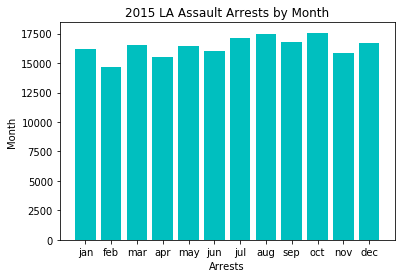

In [71]:
la_arrests_15 = plt.bar(x_axis, la_months_15, color="c")
plt.xlabel("Arrests")
plt.ylabel("Month")
plt.title("2015 LA Assault Arrests by Month")
plt.show

In [73]:
start_date = datetime.datetime(2016, 1, 1)
end_date = datetime.datetime(2016, 12, 31)
la_sixteen = (la_df["DATE OCC"] > start_date) & (la_df["DATE OCC"] <= end_date)
la_sixteen_df = la_df.loc[la_sixteen]

la_jan_16 = []
la_feb_16 = []
la_mar_16 = []
la_apr_16 = []
la_may_16 = []
la_jun_16 = []
la_jul_16 = []
la_aug_16 = []
la_sep_16 = []
la_oct_16 = []
la_nov_16 = []
la_dec_16 = []

for date in la_sixteen_df["DATE OCC"]:
    if (date > datetime.datetime(2016, 1, 1)) & (date < datetime.datetime(2016, 1, 31)):
        la_jan_16.append(date)
    elif (date > datetime.datetime(2016, 2, 1)) & (date < datetime.datetime(2016, 2, 29)):
            la_feb_16.append(date)
    elif (date > datetime.datetime(2016, 3, 1)) & (date < datetime.datetime(2016, 3, 31)):
            la_mar_16.append(date)
    elif (date > datetime.datetime(2016, 4, 1)) & (date < datetime.datetime(2016, 4, 30)):
            la_apr_16.append(date)
    elif (date > datetime.datetime(2016, 5, 1)) & (date < datetime.datetime(2016, 5, 31)):
            la_may_16.append(date)
    elif (date > datetime.datetime(2016, 6, 1)) & (date < datetime.datetime(2016, 6, 30)):
            la_jun_16.append(date)
    elif (date > datetime.datetime(2016, 7, 1)) & (date < datetime.datetime(2016, 7, 31)):
            la_jul_16.append(date)
    elif (date > datetime.datetime(2016, 8, 1)) & (date < datetime.datetime(2016, 8, 31)):
            la_aug_16.append(date)
    elif (date > datetime.datetime(2016, 9, 1)) & (date < datetime.datetime(2016, 9, 30)):
            la_sep_16.append(date)
    elif (date > datetime.datetime(2016, 10, 1)) & (date < datetime.datetime(2016, 10, 31)):
            la_oct_16.append(date)
    elif (date > datetime.datetime(2016, 11, 1)) & (date < datetime.datetime(2016, 11, 30)):
            la_nov_16.append(date)
    elif (date > datetime.datetime(2016, 12, 1)) & (date < datetime.datetime(2016, 12, 31)):
            la_dec_16.append(date)

la_months_16 = [len(la_jan_16), len(la_feb_16), len(la_mar_16), len(la_apr_16), len(la_may_16), len(la_jun_16), len(la_jul_16), len(la_aug_16), len(la_sep_16), len(la_oct_16), len(la_nov_16), len(la_dec_16)]

<function matplotlib.pyplot.show(*args, **kw)>

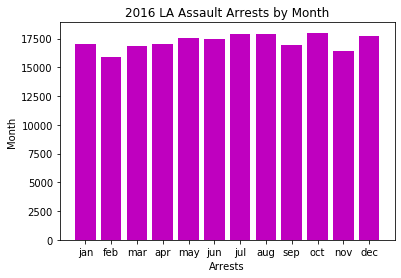

In [74]:
la_arrests_16 = plt.bar(x_axis, la_months_16, color="m")
plt.xlabel("Arrests")
plt.ylabel("Month")
plt.title("2016 LA Assault Arrests by Month")
plt.show

In [75]:
start_date = datetime.datetime(2017, 1, 1)
end_date = datetime.datetime(2017, 12, 31)
la_seventeen = (la_df["DATE OCC"] > start_date) & (la_df["DATE OCC"] <= end_date)
la_seventeen_df = la_df.loc[la_seventeen]

la_jan_17 = []
la_feb_17 = []
la_mar_17 = []
la_apr_17 = []
la_may_17 = []
la_jun_17 = []
la_jul_17 = []
la_aug_17 = []
la_sep_17 = []
la_oct_17 = []
la_nov_17 = []
la_dec_17 = []

for date in la_seventeen_df["DATE OCC"]:
    if (date > datetime.datetime(2017, 1, 1)) & (date < datetime.datetime(2017, 1, 31)):
        la_jan_17.append(date)
    elif (date > datetime.datetime(2017, 2, 1)) & (date < datetime.datetime(2017, 2, 28)):
            la_feb_17.append(date)
    elif (date > datetime.datetime(2017, 3, 1)) & (date < datetime.datetime(2017, 3, 31)):
            la_mar_17.append(date)
    elif (date > datetime.datetime(2017, 4, 1)) & (date < datetime.datetime(2017, 4, 30)):
            la_apr_17.append(date)
    elif (date > datetime.datetime(2017, 5, 1)) & (date < datetime.datetime(2017, 5, 31)):
            la_may_17.append(date)
    elif (date > datetime.datetime(2017, 6, 1)) & (date < datetime.datetime(2017, 6, 30)):
            la_jun_17.append(date)
    elif (date > datetime.datetime(2017, 7, 1)) & (date < datetime.datetime(2017, 7, 31)):
            la_jul_17.append(date)
    elif (date > datetime.datetime(2017, 8, 1)) & (date < datetime.datetime(2017, 8, 31)):
            la_aug_17.append(date)
    elif (date > datetime.datetime(2017, 9, 1)) & (date < datetime.datetime(2017, 9, 30)):
            la_sep_17.append(date)
    elif (date > datetime.datetime(2017, 10, 1)) & (date < datetime.datetime(2017, 10, 31)):
            la_oct_17.append(date)
    elif (date > datetime.datetime(2017, 11, 1)) & (date < datetime.datetime(2017, 11, 30)):
           la_nov_17.append(date)
    elif (date > datetime.datetime(2017, 12, 1)) & (date < datetime.datetime(2017, 12, 31)):
            la_dec_17.append(date)

la_months_17 = [len(la_jan_17), len(la_feb_17), len(la_mar_17), len(la_apr_17), len(la_may_17), len(la_jun_17), len(la_jul_17), len(la_aug_17), len(la_sep_17), len(la_oct_17), len(la_nov_17), len(la_dec_17)]

<function matplotlib.pyplot.show(*args, **kw)>

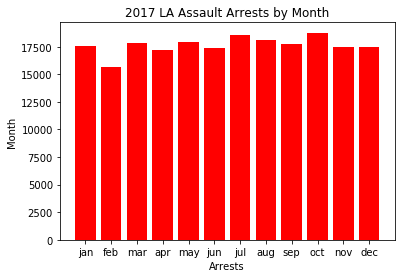

In [76]:
la_arrests_17 = plt.bar(x_axis, la_months_17, color="r")
plt.xlabel("Arrests")
plt.ylabel("Month")
plt.title("2017 LA Assault Arrests by Month")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

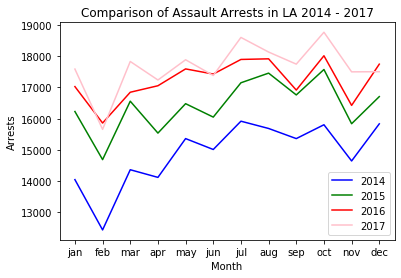

In [77]:
la_fourteen_line, = plt.plot(x_axis, la_months_14, color="blue", label="2014" )
la_fifteen_line, = plt.plot(x_axis, la_months_15, color="green", label="2015")
la_sixteen_line, = plt.plot(x_axis, la_months_16, color="red", label="2016")
la_seventeen_line, = plt.plot(x_axis, la_months_17, color="pink", label="2017")


plt.legend(handles=[la_fourteen_line, la_fifteen_line, la_sixteen_line, la_seventeen_line], loc="best")

plt.xlabel("Month")
plt.ylabel("Arrests")
plt.title("Comparison of Assault Arrests in LA 2014 - 2017")
plt.show

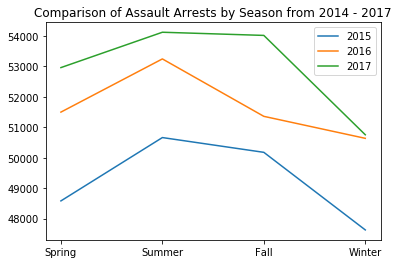

In [78]:
la_spring_15 = len(la_mar_15) + len(la_apr_15) + len(la_may_15)
la_spring_16 = len(la_mar_16) + len(la_apr_16) + len(la_may_16)
la_spring_17 = len(la_mar_17) + len(la_apr_17) + len(la_may_17)

la_summer_15 = len(la_jun_15) + len(la_jul_15) + len(la_aug_15)
la_summer_16 = len(la_jun_16) + len(la_jul_16) + len(la_aug_16)
la_summer_17 = len(la_jun_17) + len(la_jul_17) + len(la_aug_17)

la_fall_15 = len(la_sep_15) + len(la_oct_15) + len(la_nov_15)
la_fall_16 = len(la_sep_16) + len(la_oct_16) + len(la_nov_16)
la_fall_17 = len(la_sep_17) + len(la_oct_17) + len(la_nov_17)

la_winter_15 = len(la_dec_15) + len(la_jan_15) + len(la_feb_15)
la_winter_16 = len(la_dec_16) + len(la_jan_16) + len(la_feb_16)
la_winter_17 = len(la_dec_17) + len(la_jan_17) + len(la_feb_17)

x_axis_seasons = ["Spring", "Summer", "Fall", "Winter"]
la_seasons_15 = [la_spring_15, la_summer_15, la_fall_15, la_winter_15]
la_seasons_16 = [la_spring_16, la_summer_16, la_fall_16, la_winter_16]
la_seasons_17 = [la_spring_17, la_summer_17, la_fall_17, la_winter_17]

la_fifteen_season, = plt.plot(x_axis_seasons, la_seasons_15, label="2015")
la_sixteen_season, = plt.plot(x_axis_seasons, la_seasons_16, label="2016")
la_seventeen_season, = plt.plot(x_axis_seasons, la_seasons_17, label="2017")

plt.title("Comparison of Assault Arrests by Season from 2014 - 2017")
plt.legend(handles=[fifteen_season, sixteen_season, seventeen_season], loc="best")

In [79]:
#statistical analysis comparing NYC to LA arrests
population1 = months_15 + months_16 + months_17
population2 = la_months_15 + la_months_16 + la_months_17
print(population1)

[3454, 3280, 3883, 3667, 4047, 3813, 4222, 4081, 3757, 3745, 3412, 3419, 3674, 3487, 3841, 3798, 4213, 3917, 4133, 4168, 3635, 3908, 3295, 3378, 3843, 3294, 3714, 3691, 4039, 3848, 3950, 3821, 3607, 3968, 3423, 3265]


In [81]:
stats.ttest_ind(population1, population2, equal_var=False)
#pvalue = 2.02 meaning the differences between the arrests per month over 3 years in each population is not statistically
#significant

Ttest_indResult(statistic=-84.89311826868219, pvalue=2.0252933051960925e-48)

In [82]:
#ANOVA for NYC population years 2015 to 2017
group1 = months_15
group2 = months_16
group3 = months_17

In [84]:
stats.f_oneway(group1, group2, group3)
#pvalue is .77 meaning the differences between the arrests each year in NYC are not statistically significant

F_onewayResult(statistic=0.25326373036853167, pvalue=0.7777581367823811)

In [85]:
#ANOVA for LA population years 2015 to 2017
la_group1 = la_months_15
la_group2 = la_months_16
la_group3 = la_months_17

In [86]:
stats.f_oneway(la_group1, la_group2, la_group3)
#pvalue is .001 meaning the differences between the arrests each year in LA are statistically significant

F_onewayResult(statistic=8.180279002727186, pvalue=0.0013022939046163481)

In [87]:
#ANOVA for number of arrests across NYC seasons in 2017
season_group_1 = len(mar_17), len(apr_17), len(may_17)
season_group_2 = len(jun_17), len(jul_17), len(aug_17)
season_group_3 = len(sep_17), len(oct_17), len(nov_17)
season_group_4 = len(dec_17), len(jan_17), len(feb_17)

In [88]:
stats.f_oneway(season_group_1, season_group_2, season_group_3, season_group_4)
#pvalue is .24 meaning the differences between the arrests each season in NYC are not statistically significant

F_onewayResult(statistic=1.7434844541708565, pvalue=0.23536575335766952)

In [89]:
#ANOVA for number of arrests across LA seasons in 2017
la_season_group_1 = len(la_mar_17), len(la_apr_17), len(la_may_17)
la_season_group_2 = len(la_jun_17), len(la_jul_17), len(la_aug_17)
la_season_group_3 = len(la_sep_17), len(la_oct_17), len(la_nov_17)
la_season_group_4 = len(la_dec_17), len(la_jan_17), len(la_feb_17)

In [90]:
stats.f_oneway(la_season_group_1, la_season_group_2, la_season_group_3, la_season_group_4)
#pvalue is .28 meaning the differences between the arrests each season in LA are not statistically significant

F_onewayResult(statistic=1.5153275734280447, pvalue=0.28327121329558697)

In [93]:
##____________________DON'T RUN THESE NEXT THREE CELLS____________________## 
# Find the closest fast food restaurant to each set of coordinates
# ----------------------------------
# *Do not run cell again as to avoid overcharge and massive time delay
# *Instead just refer to restaurants.csv for results of this cell's code
# ----------------------------------

# Google API used to find nearby restaurants
#base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
#
## Set parameters for the API url
#params = {
#    "rankby": "distance",
#    "types": "restaurant",
#    "keyword": "fast food",
#    "key": g_key
#}
#
## Loop through entire dataframe to retrieve closest restaurant to each set of coordinates
#for index, row in crime_df.iterrows():
#    
#    # get coordinates from dataframe
#    lat = row["Latitude"]
#    lng = row["Longitude"]
#
#    # change location each iteration while leaving original params in place
#    params["location"] = f"{lat},{lng}"
#
#    # make request
#    name_address = requests.get(base_url, params=params)A
#
#    # convert and reassign variable to json
#    name_address = name_address.json()
#
#    # Since some data may be missing we incorporate a try-except to skip any that are missing a data point
#    # Add results of the API call as colums to crime_df
#    try:
#        crime_df.loc[index, "Closest Restaurant"] = name_address["results"][0]["name"]
#        crime_df.loc[index, "Restaurant Address"] = name_address["results"][0]["vicinity"]
#    except (KeyError, IndexError):
#        print("Missing field/result... skipping.")

In [ ]:
# View dataframe resulting from API call in previous cell
#crime_df.head()

In [ ]:
# Export New Dataframe to CSV
#crime_df.to_csv("restaurants.csv", index=False)

In [123]:
# Read in CSV as dataframe to use for all further analysis
restaurants_df = pd.read_csv("../crime_data/restaurants.csv")
restaurants_df.head()

,ARREST_DATE,PD_DESC,OFNS_DESC,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,Closest Restaurant,Restaurant Address
0,10/31/14,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,25-44,M,WHITE HISPANIC,40.731668,-73.989415,Chick-fil-A,"5 University Pl, New York"
1,10/31/14,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,18-24,M,WHITE HISPANIC,40.864328,-73.868406,McDonald's,"2516 White Plains Rd, The Bronx"
2,10/31/14,"MURDER,UNCLASSIFIED",MURDER & NON-NEGL. MANSLAUGHTER,25-44,F,BLACK,40.671111,-73.913563,KFC,"1667 Pitkin Ave, Brooklyn"
3,10/31/14,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,18-24,F,BLACK,40.648867,-73.950822,Burger King,"2848 Church Ave, Brooklyn"
4,10/31/14,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,25-44,M,BLACK,40.717115,-73.920426,Popeyes Louisiana Kitchen,"259 Vandervoort Ave, Brooklyn"


In [124]:
# Drop unnecessary columns from dataframe
by_address = restaurants_df[['Closest Restaurant', 'Restaurant Address','Latitude','Longitude']]

# Isolate the 10 (or however many desired) specific restaurants (by address, not franchise)
# with the highest number of nearby crimes, from highest to lowest
# ----------------------------------
# *Note - .value_counts() only creates a dataframe that consists of a single series
# which must be merged into original dataframe afterword
# ----------------------------------
top_ten = pd.DataFrame(by_address['Restaurant Address'].value_counts().head(10))
top_ten = top_ten.reset_index()
top_ten.columns = ['Restaurant Address', 'Number of Crimes']

# Merge top ten restaurants with their nearby crime counts with original dataframe
top_ten = pd.merge(top_ten,restaurants_df,on='Restaurant Address')

# Drop all unnecessary columns after merge and organize new dataframe
top_ten = top_ten[['Closest Restaurant','Restaurant Address','Latitude','Longitude','Number of Crimes']]
top_ten.rename(columns ={'Closest Restaurant':'Restaurant',
                         'Restaurant Address':'Address'})

# Only show each restaurant once
top_ten = top_ten.drop_duplicates(subset = 'Restaurant Address').reset_index()

# Drop column with original indeces
del top_ten['index']

# View resulting dataframe
top_ten

,Closest Restaurant,Restaurant Address,Latitude,Longitude,Number of Crimes
0,White Castle,"3101 Atlantic Ave, Brooklyn",40.671412,-73.881512,67
1,Kennedy Chicken And Pizza,"2041 Grand Concourse, The Bronx",40.853587,-73.900591,63
2,Texas Chicken & Burgers,"2660 3rd Ave, The Bronx",40.812200,-73.930229,62
3,White Castle,"1677 Bruckner Blvd, The Bronx",40.823387,-73.870170,55
4,Hyderi Fast Food Inc,"4049 Laconia Ave, The Bronx",40.885846,-73.845839,53
5,Kennedy fried chicken,"381 Bedford Park Blvd, The Bronx",40.869407,-73.879998,53
6,KFC,"1667 Pitkin Ave, Brooklyn",40.671111,-73.913563,51
7,Coffee cosina,"1350 Jerome Ave, The Bronx",40.837782,-73.919458,48
8,McDonald's,"875 Garrison Ave, The Bronx",40.804013,-73.878332,48
9,McDonald's,"2870 3rd Ave, The Bronx",40.822298,-73.911694,42


In [125]:
# Configure gmaps
gmaps.configure(api_key=g_key)

# Template for map markers
info_box_template = """
<dl>
<dt>Restaurant</dt><dd>{Closest Restaurant}</dd>
<dt>Address</dt><dd>{Restaurant Address}</dd>
<dt>Number of Crimes Nearby</dt><dd>{Number of Crimes}</dd>
</dl>
"""

# Assign variable to dataframe row to use on markers
restaurant_info = [info_box_template.format(**row) for index, row in top_ten.iterrows()]

# Assign variable for marker layer to dataframe coordinates
locations = top_ten[["Latitude", "Longitude"]]

# Display map
fig = gmaps.figure()

# Assign and add marker layer including restaurant information
marker_layer = gmaps.marker_layer(locations, info_box_content=restaurant_info)
fig.add_layer(marker_layer)

# Display Map with clickable marker info boxes
fig

Figure(layout=FigureLayout(height='420px'))

In [126]:
# Combine duplicate restaurants that are labeled differently
restaurants_df['Closest Restaurant'] = restaurants_df['Closest Restaurant'].str.replace('Texas Chicken and Burgers','Texas Chicken & Burgers', case = True)
restaurants_df['Closest Restaurant'] = restaurants_df['Closest Restaurant'].str.replace('kennedy fried chicken','Kennedy Fried Chicken', case = True)
restaurants_df['Closest Restaurant'] = restaurants_df['Closest Restaurant'].str.replace('Kennedy fried chicken','Kennedy Fried Chicken', case = True)
restaurants_df['Closest Restaurant'] = restaurants_df['Closest Restaurant'].str.replace('Kennedy fried chicken 253','Kennedy Fried Chicken', case = True)
restaurants_df['Closest Restaurant'] = restaurants_df['Closest Restaurant'].str.replace('Kennedy\'s Chicken & Sandwiches','Kennedy Fried Chicken', case = True)
restaurants_df['Closest Restaurant'] = restaurants_df['Closest Restaurant'].str.replace('Kennedy Chicken','Kennedy Fried Chicken', case = True)
restaurants_df['Closest Restaurant'] = restaurants_df['Closest Restaurant'].str.replace('Kennedy Fried Chicken & Grill','Kennedy Fried Chicken', case = True)

restaurants_df.head()

,ARREST_DATE,PD_DESC,OFNS_DESC,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,Closest Restaurant,Restaurant Address
0,10/31/14,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,25-44,M,WHITE HISPANIC,40.731668,-73.989415,Chick-fil-A,"5 University Pl, New York"
1,10/31/14,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,18-24,M,WHITE HISPANIC,40.864328,-73.868406,McDonald's,"2516 White Plains Rd, The Bronx"
2,10/31/14,"MURDER,UNCLASSIFIED",MURDER & NON-NEGL. MANSLAUGHTER,25-44,F,BLACK,40.671111,-73.913563,KFC,"1667 Pitkin Ave, Brooklyn"
3,10/31/14,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,18-24,F,BLACK,40.648867,-73.950822,Burger King,"2848 Church Ave, Brooklyn"
4,10/31/14,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,25-44,M,BLACK,40.717115,-73.920426,Popeyes Louisiana Kitchen,"259 Vandervoort Ave, Brooklyn"


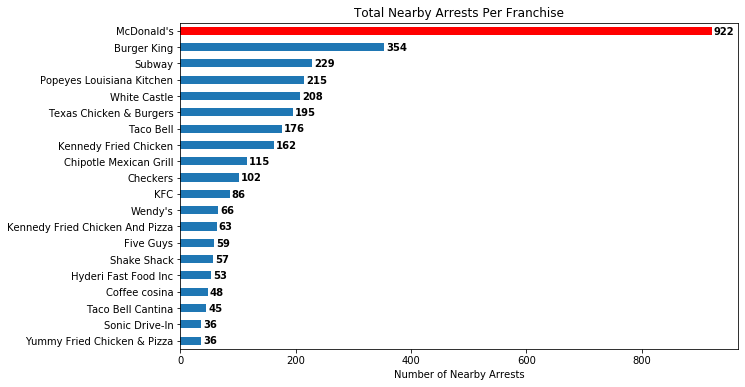

In [127]:
# Bar graph of top twenty fast food restaurants with nearby crimes
# plot.barh() creates horizontal bar plot - easier to read restaurant names
y = restaurants_df['Closest Restaurant'].value_counts().head(20).sort_values(ascending=True)
restaurant_count = y.plot.barh(figsize = (10,6))

# Add labels and title
plt.xlabel('Number of Nearby Arrests')
plt.title('Total Nearby Arrests Per Franchise')

# Solution for adding values to bar chart:
# https://stackoverflow.com/questions/53066633/python-how-to-show-values-on-top-of-bar-plot
for i, v in enumerate(y):
    plt.text(v + 3, i - .2, str(v), color='black', fontweight='bold')

# Color only McDonald's bar for reference
restaurant_count.patches[y.index.get_indexer(['McDonald\'s'])[0]].set_facecolor('r')

# Save plot to .png file
plt.savefig('Total_Arrests_Bar_Chart.png')

plt.show()

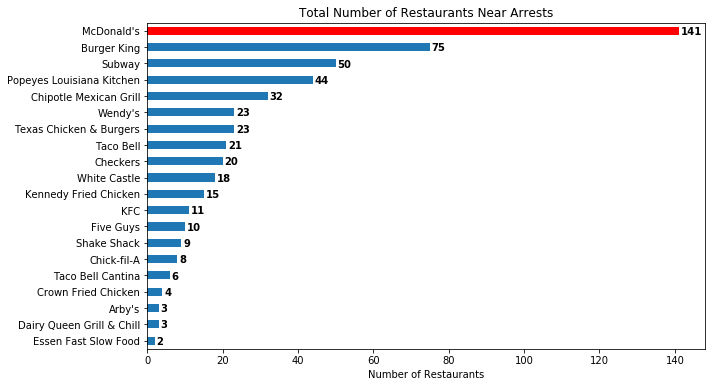

In [128]:
# Find amount of nearby crimes per each unique restaurant
unique_restaurants_df = restaurants_df.drop_duplicates(subset = 'Restaurant Address').reset_index()
y = unique_restaurants_df['Closest Restaurant'].value_counts().head(20).sort_values(ascending=True)
# Plot amount of crimes per each unique restaurant and categorize by franchise on bar chart
restaurant_count = y.plot.barh(figsize = (10,6))

# Add labels and title
plt.xlabel('Number of Restaurants')
plt.title('Total Number of Restaurants Near Arrests')

# Solution for adding values to bar chart:
# https://stackoverflow.com/questions/53066633/python-how-to-show-values-on-top-of-bar-plot
for i, v in enumerate(y):
    plt.text(v + .5, i - .22, str(v), color='black', fontweight='bold')
    
# Color only McDonald's bar for reference
restaurant_count.patches[y.index.get_indexer(['McDonald\'s'])[0]].set_facecolor('r')

# Save plot to .png file
plt.savefig('Total_Restaurants_Bar_Chart.png')

plt.show()

In [129]:
# Construct a DataFrame that yields a ratio of number of crimes per franchise

# Count the number of crimes per franchise
num_crimes_df = pd.DataFrame(restaurants_df['Closest Restaurant'].value_counts().reset_index())

# Count the number of unique restaurants for each franchise
num_restaurants_df = pd.DataFrame(unique_restaurants_df['Closest Restaurant'].value_counts().reset_index())

# Create DataFrames containing above results
num_crimes_df.columns = ['Restaurant Name','Number of Crimes Nearby']
num_restaurants_df.columns = ['Restaurant Name','Number of Restaurants']

# Merge DataFrames together into on in order to compare numbers
ratio_df = pd.merge(num_crimes_df,num_restaurants_df,on='Restaurant Name')

# Create column that calculates ratio of crimes to restaurants and sort ascending for sake of bar chart
ratio_df['Crime Ratio'] = round(ratio_df['Number of Crimes Nearby']/ratio_df['Number of Restaurants'],2)
dangerous_ratio_df = ratio_df.sort_values('Crime Ratio', ascending=True)

# Isolate restaurants with more than 3 locations to only look at popular restaurants
dangerous_franchises = dangerous_ratio_df.loc[dangerous_ratio_df['Number of Restaurants'] > 3]

dangerous_franchises

,Restaurant Name,Number of Crimes Nearby,Number of Restaurants,Crime Ratio
11,Wendy's,66,23,2.87
24,Chick-fil-A,25,8,3.12
8,Chipotle Mexican Grill,115,32,3.59
2,Subway,229,50,4.58
1,Burger King,354,75,4.72
3,Popeyes Louisiana Kitchen,215,44,4.89
9,Checkers,102,20,5.10
13,Five Guys,59,10,5.90
26,Crown Fried Chicken,24,4,6.00
14,Shake Shack,57,9,6.33


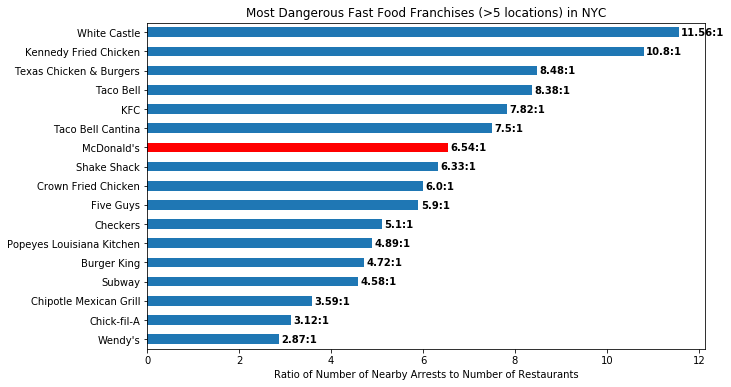

In [130]:
# Create DataFrame to use for bar chart
restaurant_plot = dangerous_franchises[['Restaurant Name', 'Crime Ratio']]

# Plot bar graph of most dangerous restaurants in NYC by franchise
a = restaurant_plot.plot.barh('Restaurant Name','Crime Ratio', figsize = (10,6), legend=None)
a

# Assign variable for enumerate functions
y = restaurant_plot['Crime Ratio']

# Add labels and title
plt.ylabel('')
plt.xlabel('Ratio of Number of Nearby Arrests to Number of Restaurants')
plt.title('Most Dangerous Fast Food Franchises (>5 locations) in NYC')

# Solution for adding values to bar chart:
# https://stackoverflow.com/questions/53066633/python-how-to-show-values-on-top-of-bar-plot
for i, v in enumerate(y):
    plt.text(v + .05, i - .17, str(f'{v}:1'), color='black', fontweight='bold')
    
# Color only McDonald's bar for reference
# Source code: https://stackoverflow.com/questions/48547697/change-colour-of-bars-based-on-string-value
for i,b in enumerate(y):
    if b:
        a.patches[10].set_facecolor('red')
    
# Save plot to .png file
plt.savefig('Most_Dangerous_Bar_Chart.png')

plt.show()

In [ ]:
weather_file = "../2017_weather.csv"
july_weather = pd.read_csv(weather_file)
july_weather["Date"] = pd.to_datetime(july_weather["Date"])
july_weather.head()

In [ ]:
crime_file = "../2017_crimes.csv"
crime_df = pd.read_csv(crime_file)

In [ ]:
july_crimes = crime_df.groupby("Crime Date")
july_crimes = july_crimes.count()
july_crimes = july_crimes.reset_index()
july_crimes.head()

In [ ]:
july_crimes["Crime Date"] = pd.to_datetime(july_crimes["Crime Date"])
july_crimes = july_crimes.sort_values(by="Crime Date")
july_crimes = july_crimes.rename(columns = {"Crime Date":"Date", "Crime Type":"Crime Count"})
july_crimes.head()

In [ ]:
july_analysis = pd.merge(july_weather, july_crimes, on="Date")
july_analysis

In [ ]:
x_axis = july_analysis["Date"]
y_axis = july_analysis["Max Temp"]

y_axis_2 = july_analysis["Crime Count"]
plt.plot(x_axis, y_axis_2)
plt.plot(x_axis, y_axis)
plt.title("July Crime VS Weather")
plt.show()

In [ ]:
plt.plot(x_axis, y_axis)

In [ ]:
jan_temp = []
feb_temp = []
mar_temp = []
apr_temp = []
may_temp = []
jun_temp = []
jul_temp = []
aug_temp = []
sep_temp = []
oct_temp = []
nov_temp = []
dec_temp = []

for date in weather_df["Date"]:
    if (date > datetime.datetime(2017, 1, 1)) & (date < datetime.datetime(2017, 1, 31)):
        jan_temp.append(weather_df["Max Temp"])
        
days = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
jan_dict = {"Day": days, "Temp": jan_temp}
# df = pd.DataFrame(jan_dict)
# df
jan_temp

In [ ]:
plt.plot(x_axis, avg_temp)

In [ ]:
months = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
avg_temp = [40, 46, 45, 64, 67, 79, 84, 81, 78, 70, 52, 38]

plt.plot(months, avg_temp)
plt.title("2017 Weather")
plt.show()
plt.plot(months, twentyseventeen)
plt.title("2017 Crimes")
plt.show()

Text(0.5, 1.0, "Who's Fault Is It?")

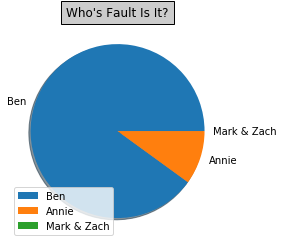

In [134]:
#Fault Chart
fault = {
    'Ben':[90],
    'Annie':[10],
    'Mark & Zach':[0]
}
fault = pd.DataFrame(data=fault)
labels = ["Ben","Annie","Mark & Zach"]
#-------------------------------------------------------------------
plt.pie(fault, labels=labels, shadow=True)
plt.legend(loc="lower left")
plt.title("Who's Fault Is It?", bbox={'facecolor':'0.8', 'pad':5})